In [17]:
import numpy as np
import sys
sys.path.insert(1,'/home/zhanibek/.local/lib/python2.7/site-packages/cv2')
sys.path.insert(1,'/home/zhanibek/catkin_ws/src/smart_tray/scripts/')
import cv2 
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook
import pickle
import pandas as pd
from phri.utils import *

### Constants

In [18]:
meta_data_path = '/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/parsed/test/test_1_2020-10-08-22-15-20_meta_data.pkl'

In [19]:
meta_data = pickle.load(open(meta_data_path))

In [20]:
meta_data.keys()

['/cam1_pose_estimation',
 '/camera_1',
 'summary',
 '/aruco_cam1_pose',
 '/RFT_FORCE_2',
 '/RFT_FORCE',
 '/imu_data']

In [21]:
summary = meta_data['summary']
cam1_df = meta_data['/camera_1']
arcam1_df = meta_data['/aruco_cam1_pose']
rft1_df = meta_data['/RFT_FORCE']
rft2_df = meta_data['/RFT_FORCE_2']
imu_df = meta_data['/imu_data']
pose1_df = meta_data['/cam1_pose_estimation']


### Summary

In [22]:
summary

,topic_name,message_count,frequency,msg_type,start_time,end_time
0,/camera_1,1124,29.879493,sensor_msgs/Image,1.602213e+09,1.602213e+09
1,/aruco_cam1_pose,1416,29.838468,sensor_msgs/Image,1.602213e+09,1.602213e+09
2,/cam1_pose_estimation,1489,29.845794,geometry_msgs/PoseStamped,1.602213e+09,1.602213e+09
3,/imu_data,3458,76.458866,smart_tray/imu_msg,1.602213e+09,1.602213e+09
4,/RFT_FORCE,44024,996.508434,geometry_msgs/WrenchStamped,1.602213e+09,1.602213e+09
5,/RFT_FORCE_2,44061,995.798670,geometry_msgs/WrenchStamped,1.602213e+09,1.602213e+09


In [23]:
t0 = summary.start_time[0]
tf = summary.end_time[0]

### Camera 1

In [24]:
cam1_df.head()

,seq,time_stamp,frame_id,image_path
0,51538,1.602213e+09,camera_1_51537,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
1,51539,1.602213e+09,camera_1_51538,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
2,51540,1.602213e+09,camera_1_51539,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
3,51541,1.602213e+09,camera_1_51540,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
4,51542,1.602213e+09,camera_1_51541,/home/zhanibek/catkin_ws/src/smart_tray/data/r...


379


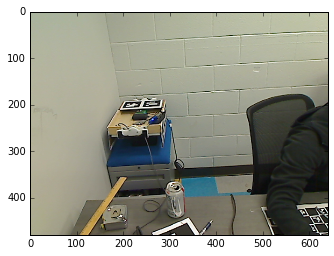

In [25]:
df = cam1_df
ind = np.random.randint(df.shape[0])
impath = df.image_path.iloc[ind]
im = read_image(impath)
plt.imshow(im)
print ind

In [26]:
arcam1_df.head()

,seq,time_stamp,frame_id,image_path
0,51373,0.0,,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
1,51374,0.0,,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
2,51375,0.0,,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
3,51376,0.0,,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
4,51377,0.0,,/home/zhanibek/catkin_ws/src/smart_tray/data/r...


1247


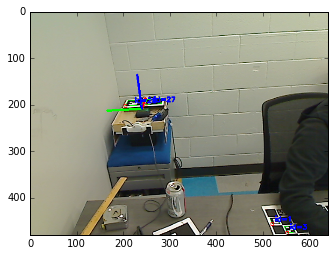

In [27]:
df = arcam1_df
ind = np.random.randint(df.shape[0])
impath = df.image_path.iloc[ind]
im = read_image(impath)
plt.imshow(im)
print ind

### Force Data

In [62]:
rft1_df.head()

,seq,time_stamp,frame_id,force,torque
0,1664273,1.602213e+09,C00300122,"[0.0, 0.0, -0.20000000298023224]","[-0.001500000013038516, 0.0, -0.20000000298023..."
1,1664274,1.602213e+09,C00300122,"[0.0, 0.0, -0.18000000715255737]","[-0.001500000013038516, 0.0, -0.18000000715255..."
2,1664275,1.602213e+09,C00300122,"[0.0, 0.0, -0.1599999964237213]","[-0.0010000000474974513, 0.0, -0.1599999964237..."
3,1664276,1.602213e+09,C00300122,"[-0.019999999552965164, 0.019999999552965164, ...","[-0.0010000000474974513, 0.019999999552965164,..."
4,1664277,1.602213e+09,C00300122,"[-0.019999999552965164, 0.03999999910593033, -...","[0.0, 0.03999999910593033, -0.10000000149011612]"


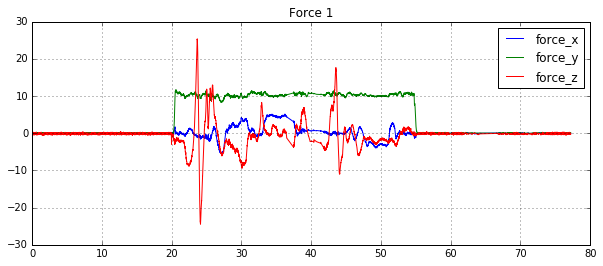

In [63]:
df = rft1_df
force1_x = df.force.apply(lambda x: x[0])
force1_y = df.force.apply(lambda x: x[1])
force1_z = df.force.apply(lambda x: x[2])

rft1_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(rft1_t_vec, force1_x)
plt.plot(rft1_t_vec, force1_y)
plt.plot(rft1_t_vec, force1_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 1')

In [29]:
rft2_df.head()

,seq,time_stamp,frame_id,force,torque
0,1664539,1.602213e+09,C00300119,"[0.019999999552965164, 0.0, 0.47999998927116394]","[-0.0010000000474974513, 0.0, 0.47999998927116..."
1,1664540,1.602213e+09,C00300119,"[0.019999999552965164, 0.0, 0.5]","[-0.001500000013038516, 0.0, 0.5]"
2,1664541,1.602213e+09,C00300119,"[0.0, 0.0, 0.5199999809265137]","[-0.0020000000949949026, 0.0, 0.5199999809265137]"
3,1664542,1.602213e+09,C00300119,"[0.0, 0.0, 0.5400000214576721]","[-0.0024999999441206455, 0.0, 0.5400000214576721]"
4,1664543,1.602213e+09,C00300119,"[0.0, 0.0, 0.5600000023841858]","[-0.0024999999441206455, 0.0, 0.5600000023841858]"


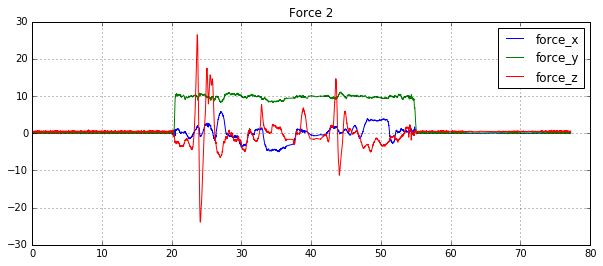

In [64]:
df = rft2_df
force2_x = df.force.apply(lambda x: x[0])
force2_y = df.force.apply(lambda x: x[1])
force2_z = df.force.apply(lambda x: x[2])

rft2_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(rft2_t_vec, force2_x)
plt.plot(rft2_t_vec, force2_y)
plt.plot(rft2_t_vec, force2_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 2')

### Position Data

In [52]:
pose1_df.head()

,seq,time_stamp,frame_id,position,quaternion
0,51373,1.602213e+09,camera_1_51536,"[-0.2797228359457306, -0.11320748549554417, 1....","[-0.5872227432683191, 0.6109420736648671, -0.3..."
1,51374,1.602213e+09,camera_1_51537,"[-0.2797228359457306, -0.11320748549554417, 1....","[-0.5872227432683191, 0.6109420736648671, -0.3..."
2,51375,1.602213e+09,camera_1_51538,"[-0.2797228359457306, -0.11320748549554417, 1....","[-0.5872227432683191, 0.6109420736648671, -0.3..."
3,51376,1.602213e+09,camera_1_51539,"[-0.2797228359457306, -0.11320748549554417, 1....","[-0.5872227432683191, 0.6109420736648671, -0.3..."
4,51377,1.602213e+09,camera_1_51540,"[-0.2797228359457306, -0.11320748549554417, 1....","[-0.5872227432683191, 0.6109420736648671, -0.3..."


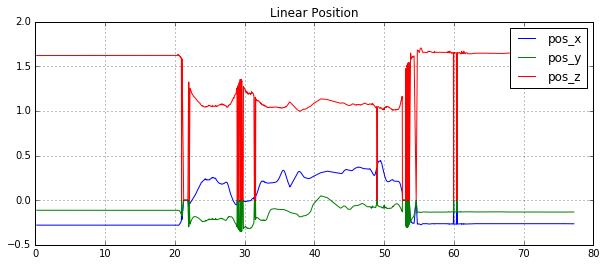

In [53]:
df = pose1_df
pos_x = df.position.apply(lambda x: x[0])
pos_y = df.position.apply(lambda x: x[1])
pos_z = df.position.apply(lambda x: x[2])

pose1_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(pose1_t_vec, pos_x)
plt.plot(pose1_t_vec, pos_y)
plt.plot(pose1_t_vec, pos_z)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

### IMU Data

In [49]:
imu_df.head()

,seq,time_stamp,frame_id,accel,gyro,mag
0,174289,1.602213e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.0801759033203125, 0.04128460693359375, 9.7...","[5.72723388671875, -20.972442626953125, -6.729...","[-0.0509600006043911, 0.18900001049041748, -0...."
1,174290,1.602213e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.09992071533203126, 0.07299597167968751, 9....","[5.884246826171875, -21.03973388671875, -6.871...","[-0.05278000235557556, 0.193900004029274, -0.5..."
2,174291,1.602213e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.11248559570312501, 0.04307958984375, 9.695...","[5.734710693359375, -21.12945556640625, -6.818...","[-0.05278000235557556, 0.19488000869750977, -0..."
3,174292,1.602213e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.088552490234375, 0.09992071533203126, 9.71...","[6.0711669921875, -21.121978759765625, -6.9010...","[-0.051100000739097595, 0.1888599991798401, -0..."
4,174293,1.602213e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.07299597167968751, 0.04607122802734375, 9....","[5.749664306640625, -21.166839599609375, -6.82...","[-0.050680000334978104, 0.18998000025749207, -..."


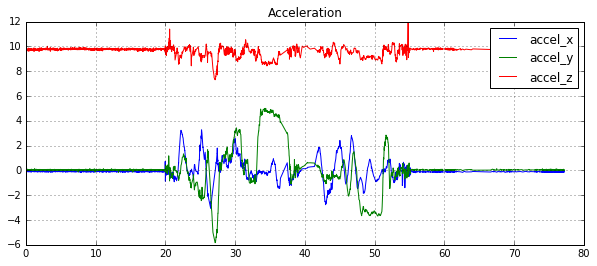

In [54]:
accel_x = imu_df.accel.apply(lambda x: x[0])
accel_y = imu_df.accel.apply(lambda x: x[1])
accel_z = imu_df.accel.apply(lambda x: x[2])

imu_t_vec = imu_df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(imu_t_vec, accel_x)
plt.plot(imu_t_vec, accel_y)
plt.plot(imu_t_vec, accel_z)
plt.grid()
plt.legend(['accel_x', 'accel_y', 'accel_z'])
plt.title('Acceleration')

In [ ]:
imu_df.accel

### Mix Plot

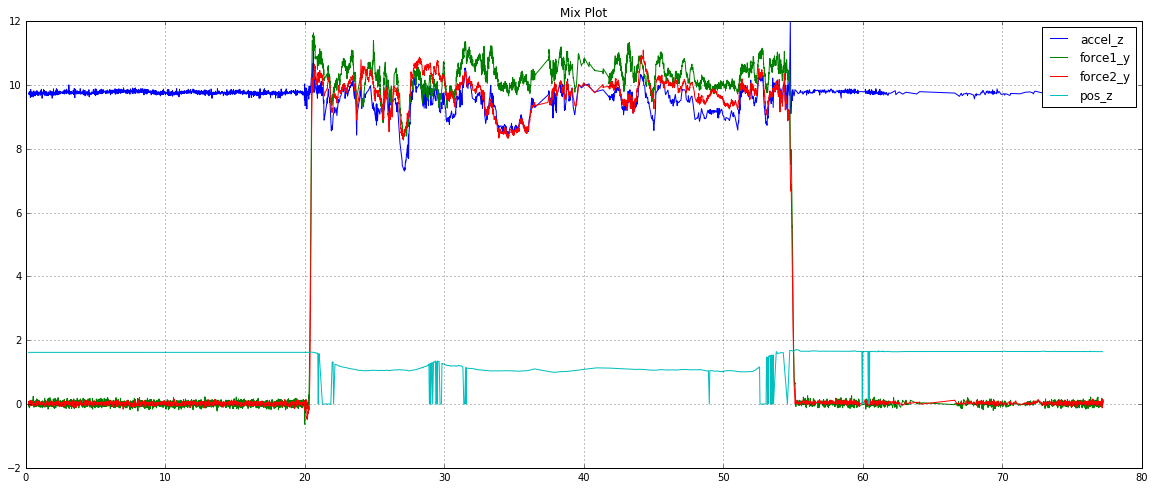

In [69]:
plt.figure(figsize=(20,8))

plt.plot(imu_t_vec, accel_z)
plt.plot(rft1_t_vec, force1_y)
plt.plot(rft2_t_vec, force2_y)
plt.plot(pose1_t_vec, pos_z)
plt.grid()
plt.legend(['accel_z', 'force1_y', 'force2_y', 'pos_z'])
plt.title('Mix Plot')
plt.xlabel('time, sec')